<font size=6><center>Predict Readmissions of Diabetic Patients Utilizing Machine Learning Methods</center> </font> 
<font size=4> Author: Yuwei Xia </font>
***

# ABSTRACT

Health care has become more and more important in U.S. nowadays and the service provided by health systems are now evaluated by a program called Hospital Readmissions Reduction Program (HRRP). This program aims to improve Americans’ health care via penalising health systems that have higher than expected readmission rates. Thus, health systems are supposed to try hard decreasing their readmission rates. Nevertheless, patterns of readmissions are hard to identify only according to clinical expertise, owing to the diversity and complexity of demographic, social, diseases and diseases-related characteristics. Therefore, this research targets diabetic patients and identifies readmission patterns of them. After rebalancing the dataset, seven machine learning models are applied, containing Logistic Regression, Decision Tree, Support Vector Machine, Naive Bayes, K-Nearest Neighbour, Random Forest and Gradient Boosting Decision Tree. Performance of these models is compared and the results show that Random Forest, whose f1-score is 93.4% and recall 88.7%, outperforms all the other methods, including those used in previous researches. Finally, top 20 features contribute most to readmissions of diabetic patients are identified by Random Forest.

# DATA

Source website: http://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008#

The dataset applied for all analysis of this research is from the UCI Repository of Machine Learning Databases[35]. This dataset contains medical records of 101765 patients diagnosed with diabetes collected from 130 U.S. hospitals for 10 years(1999-2008) and includes 50 features describing the diabetic encounters, comprising demographics, diagnoses, diabetic medications, number of visits in the year preceding the encounter and payer information[36].

All data satisfies the following criteria: 
1. It is an inpatient encounter (a hospital admission); 
2. It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis; 
3. The length of stay was at least 1 day and at most 14 days; 
4. Laboratory tests were performed during the encounter; 
5. Medications were administered during the encounter.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabete=pd.read_csv('diabetic_data.csv')

In [3]:
diabete.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# EDA

## Basic Information

In [5]:
diabete.shape

(101766, 50)

In [6]:
diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [8]:
diabete.isnull().any()

encounter_id                False
patient_nbr                 False
race                        False
gender                      False
age                         False
weight                      False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
payer_code                  False
medical_specialty           False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide 

This function to detect whether there are missing values and the results show that there are no missing values. However, this is not true because before the dataset was uploaded to the website, missing values had already been replaced by symbols such as "?" and meaningless strings. Therefore, at data pre-processing part, values of each features are checked to find out missing values.

## Label

In [64]:
d_label=diabete['readmitted']
d_label=pd.DataFrame(d_label)
d_label['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

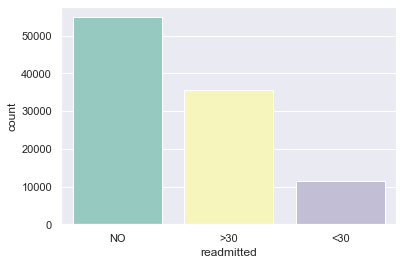

In [65]:
d_label.columns=['readmitted']
sns.set(style="darkgrid")
sns.countplot(x='readmitted',data=d_label, palette="Set3")

Since the target of this research is to predict readmissions of diabetic patients, what we care about is those who readmitted within 30 days. However,. from the distribution of 'readmitted',  it is clear '<30' only accounts for a small part. This is an extremely imbalanced dataset.

## Numerical data

In [14]:
dn=diabete[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']].describe()


In [6]:
dn.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,12725.047637,12761.721250,12722.255692,12739.643676,12726.204578,12730.391039,12723.737304,12726.919526
std,35977.978063,35963.180253,35979.106005,35972.088779,35977.513330,35975.828562,35978.508014,35977.221778
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.738831,28.168591,0.750000,9.531892,0.000000,0.000000,0.000000,4.983400
50%,4.197993,43.547820,1.522769,15.510922,0.184679,0.098918,0.817783,7.711303
75%,8.000000,75.750000,3.000000,35.250000,11.450449,19.697854,6.197147,10.750000
max,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000


<font size=3>All values are reasonable. Thus there is no outliers</font>

# DATA PREPROCESSING

## Clean Features and Samples

1. Correct wrong type features: int -> object

In [4]:
diabete[['admission_type_id','discharge_disposition_id','admission_source_id']]=diabete[['admission_type_id','discharge_disposition_id','admission_source_id']].astype('object')

2. Drop features that more than 50% values are missing, including “weight”, which has 97% missing values, “payer_code”, which has 52% missing values, and “medical specialty”, which has 53% missing values.

In [5]:
diabete.drop(['weight','payer_code','medical_specialty'],axis=1,inplace=True)

3. Drop features that are unrelated to our target.

In [6]:
diabete.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)

4. Handle with missing values : since missing values are not too many and only account for 3%, here I simply delete rows with missing values.

In [7]:
diabete['race'].replace('?',np.nan,inplace=True)
diabete['gender'].replace('Unknown/Invalid',np.nan,inplace=True)
diabete['diag_3'].replace('?',np.nan,inplace=True)
diabete.dropna(inplace=True)

In [8]:
diabete.reset_index(inplace=True,drop=True)

## Label 

In [9]:
diabete['readmitted'].value_counts()

NO     52380
>30    34681
<30    11082
Name: readmitted, dtype: int64


Since our target is to predict the readmissions of diabetic patients, we care more about encounters that readmitted within 30 days than those readmitted more than 30 days or not readmitted.    
Thus, if the value is ‘<30’, we label it as 1, otherwise (‘>30’ or ‘No’) we label it 0.

$$
Readmitted=\begin{cases}
1,&'<30' \\ 0,&otherwise
\end{cases}
$$

In [10]:
diabete['readmitted']=np.where(diabete['readmitted']=='<30',1,0)

In [11]:
diabete['readmitted'].value_counts()

0    87061
1    11082
Name: readmitted, dtype: int64

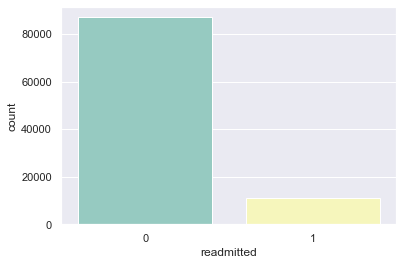

In [101]:
sns.set(style="darkgrid")
sns.countplot(x='readmitted',data=diabete, palette="Set3")

Obviously, the data is extremely imbalanced.

## Normalization

Since there is no outliers, MinMaxScaler is used to shrink the range of the continuous data such that the range is fixed between 0 and 1.

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
#get numerical features
diabete_num=diabete[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']].values


In [14]:
scaler=MinMaxScaler()
diabete_num=scaler.fit_transform(diabete_num)
diabete_num

array([[0.15384615, 0.44274809, 0.        , ..., 0.        , 0.        ,
        0.46153846],
       [0.07692308, 0.07633588, 0.83333333, ..., 0.        , 0.04761905,
        0.23076923],
       [0.07692308, 0.32824427, 0.16666667, ..., 0.        , 0.        ,
        0.30769231],
       ...,
       [0.        , 0.39694656, 0.        , ..., 0.        , 0.        ,
        0.76923077],
       [0.69230769, 0.33587786, 0.33333333, ..., 0.        , 0.04761905,
        0.46153846],
       [0.38461538, 0.09160305, 0.5       , ..., 0.        , 0.        ,
        0.46153846]])

In [15]:
diabete_num=pd.DataFrame(diabete_num)

In [16]:
diabete_minmax=diabete
diabete_minmax[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']]=diabete_num

## Apply get_dummies to do one-hot encoding for categorical features

One-Hot encoding is applied to convert categorically features into a form that can be provided to machine learning algorithms.

In [17]:
diabete_onehot=pd.get_dummies(diabete_minmax.iloc[:,0:-1])

In [18]:
diabete_onehot['readmitted']=diabete_minmax['readmitted']

In [19]:
diabete_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98143 entries, 0 to 98142
Columns: 2400 entries, time_in_hospital to readmitted
dtypes: float64(8), int64(1), uint8(2391)
memory usage: 230.5 MB


After data pre-processing, the dataset now has two thousand and four hundreds columns.

# MODEL TRAINING

Aiming to classify readmissions of diabetic patients, train-test-split is first used to divide data, and seventy-percent of the data is divided as training set and thirty testing set. Since the data is extremely imbalanced, the ratio of 1:0 is kept when split data into training set and testing set. Then several widely-used classification methods are applied in this research, including Logistic Regression (LR), Decision Tree (DT), Support Vector Classification (SVC), Naive Bayes (NB), K-Nearest Neighbour (KNN), Random Forest (RF), and Gradient Boosting Decision Tree (GBDT).  These models are first used to identify the patterns of readmissions of diabetic patients on training set based on features. The performance of all models is evaluated by predicting readmissions on testing set. To analyse the performance of the different models, multiple performance criteria are applied, including accuracy, precision, recall, and f1-score. Accuracy, precision represents the ability of a classifier not to label as positive a sample that is negative, recall represents the ability of a classifier to find all the positive samples, and f1-score can be interpreted as a weighted harmonic mean of the precision and recall.These measures are calculated as follows:
$$Accuracy = \frac{ TP+TN }{ TP+TN+FP+FN },$$
$$Precision = \frac{ TP }{ TP+FP },$$ 
$$Recall = \frac{ TP }{ TP+FN },$$ 
$$F1-score = \frac{ 2TP }{ 2TP+FP+FN },$$ 
where TP, FP, TN and FN are the number of true positives, false positives, true negatives and false negatives respectively.

LR is first used to fit the data and the results are not satisfying, with high accuracy score but low f1-score and precision score. Maybe this is because LR is not suitable for this dataset. So several other models are utilized. DT  still has relatively high accuracy and low f1-score and precision score. The f1-score and precision score of SVM is even zero. Naive Bayes even has low accuracy score. So as KNN, Random Forest and GBDT.

In [20]:
from sklearn.model_selection import train_test_split

## Divide training set and testing set

In [76]:
diabete_onehot['readmitted'].value_counts()/len(diabete_onehot)

0    0.887083
1    0.112917
Name: readmitted, dtype: float64

<font size=3>Since the data is extremely imbalanced, we keep the ratio(87061:11082) when split it in training set and testing set.</font>

In [77]:
diabete_onehot_1_x=diabete_onehot[diabete_onehot['readmitted']==1].iloc[:,0:-1].values
diabete_onehot_1_y=diabete_onehot[diabete_onehot['readmitted']==1].iloc[:,-1].values
diabete_onehot_0_x=diabete_onehot[diabete_onehot['readmitted']==0].iloc[:,0:-1].values
diabete_onehot_0_y=diabete_onehot[diabete_onehot['readmitted']==0].iloc[:,-1].values

In [78]:
diabete_onehot_1_xtrain,diabete_onehot_1_xtest,diabete_onehot_1_ytrain,diabete_onehot_1_ytest=train_test_split(diabete_onehot_1_x,diabete_onehot_1_y,test_size=0.3,random_state=42)
diabete_onehot_0_xtrain,diabete_onehot_0_xtest,diabete_onehot_0_ytrain,diabete_onehot_0_ytest=train_test_split(diabete_onehot_0_x,diabete_onehot_0_y,test_size=0.3,random_state=42)


In [79]:
diabete_oh_xtrain=np.concatenate((diabete_onehot_1_xtrain,diabete_onehot_0_xtrain),axis=0)
diabete_oh_xtest=np.concatenate((diabete_onehot_1_xtest,diabete_onehot_0_xtest),axis=0)
diabete_oh_ytrain=np.concatenate((diabete_onehot_1_ytrain,diabete_onehot_0_ytrain),axis=0)
diabete_oh_ytest=np.concatenate((diabete_onehot_1_ytest,diabete_onehot_0_ytest),axis=0)

## Logistic Regression

LR is a reasonably interpretable tool in multiple fields and is easy to implement with all kinds of programming languages. As a regression method to predict a dichotomous dependent variable, the maximum-likelihood ratio is used to determine the statistical significance of the variables in producing the LR equation[45].LR is usually formulated mathematically as:
$$P(Y \mid X) = \frac{ 1 }{ 1+e^{-f(x)}}$$,
where X is an input matrix containing all observations and features, Y is an matrix that contains discrete and binary variables, such that y∈{0,1}(y∈Y), and f(x) is a function consisting features and their corresponding weights that equals:
$$f(x)=x_0+\beta_1x_1x_0,+\beta_2x_2+...+\beta_nx_n+\epsilon$$,where $x_0,x_1,...,x_n$ represent all features, $\beta_i$ represent corresponding weights for each features, and $\epsilon$ represents the random error process inevitably happening in the data generating process.Generally speaking, LR is well-suited for describing and testing hypotheses about relationships between a categorical outcome variable and one or more categorical or continuous variables[16].

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,recall_score,confusion_matrix,classification_report,precision_score

In [81]:
lg=LogisticRegression()
lg.fit(diabete_oh_xtrain,diabete_oh_ytrain)
diabete_oh_ypred_lg=lg.predict(diabete_oh_xtest)
print('confusion matrix:',confusion_matrix(diabete_oh_ytest,diabete_oh_ypred_lg))
print('classification_report:',classification_report(diabete_oh_ytest,diabete_oh_ypred_lg))

print('accuracy_score:',accuracy_score(diabete_oh_ytest,diabete_oh_ypred_lg))
print('precision_score:',precision_score(diabete_oh_ytest,diabete_oh_ypred_lg))
print('recall_score:',recall_score(diabete_oh_ytest,diabete_oh_ypred_lg))
print('f1_score:',f1_score(diabete_oh_ytest,diabete_oh_ypred_lg))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


confusion matrix: [[26035    84]
 [ 3245    80]]
classification_report:               precision    recall  f1-score   support

           0       0.89      1.00      0.94     26119
           1       0.49      0.02      0.05      3325

    accuracy                           0.89     29444
   macro avg       0.69      0.51      0.49     29444
weighted avg       0.84      0.89      0.84     29444

accuracy_score: 0.8869379160440157
precision_score: 0.4878048780487805
recall_score: 0.02406015037593985
f1_score: 0.04585841215247922


## Decision Tree

DT is a non-parametric supervised decision support tool that uses a tree-like graph or model to predicts the value of a target variable by learning simple decision rules of features[17]. Giving training vectors $x_i∈R^n,(i=1,...,I)$ and a label vector $y∈R^l$, a decision tree recursively partitions the space such that the samples with the same labels are grouped together. Let the data at node m be represented by Q. For each candidate split $\theta=(j,t_m)$ consisting of a feature j and threshold $t_m$, partition the data into $Q_l(\theta)$ and $Q_r(\theta)$ subsets:
$$Q_l(\theta)=(x,y)\mid x_j\leqslant t_m,$$
$$Q_r(\theta)=\frac { Q }{ Q_l(\theta)}.$$
The impurity at m is computed using an impurity function $H()$, the choice of which depends on the task being solved (classification or regression). 
$$G(Q,\theta)=\frac { n_l }{ N_m } H(Q_l(\theta))+ \frac { n_r }{ N_m } H(Q_r(\theta))$$
Then select parameters that minimizes the impurity:
$$\theta^*=argmax_\theta G(Q,\theta),$$
and recurse of subsets $Q_l(\theta^*)$ and $Q_r(\theta^*)$ until the maximum allowable depth is reached.  
DT is a proper method for predicting readmissions of diabetic patients because it uses a white box model, which demonstrates that if a given situation is observable, the explanation for the condition is easily explained by Boolean logic.

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [82]:
dt=DecisionTreeClassifier()
dt.fit(diabete_oh_xtrain,diabete_oh_ytrain)
diabete_oh_ypred_dt=dt.predict(diabete_oh_xtest)
print('confusion matrix:',confusion_matrix(diabete_oh_ytest,diabete_oh_ypred_dt))
print('classification_report:',classification_report(diabete_oh_ytest,diabete_oh_ypred_dt))
print('accuracy_score:',accuracy_score(diabete_oh_ytest,diabete_oh_ypred_dt))
print('precision_score:',precision_score(diabete_oh_ytest,diabete_oh_ypred_dt))
print('recall_score:',recall_score(diabete_oh_ytest,diabete_oh_ypred_dt))
print('f1_score:',f1_score(diabete_oh_ytest,diabete_oh_ypred_dt))

confusion matrix: [[23572  2547]
 [ 2782   543]]
classification_report:               precision    recall  f1-score   support

           0       0.89      0.90      0.90     26119
           1       0.18      0.16      0.17      3325

    accuracy                           0.82     29444
   macro avg       0.54      0.53      0.53     29444
weighted avg       0.81      0.82      0.82     29444

accuracy_score: 0.8190123624507539
precision_score: 0.17572815533980582
recall_score: 0.16330827067669174
f1_score: 0.16929072486360094


## SVM

SVC is one of the SVM methods that could be use to perform classification tasks. The objective of SVM is to find a hyperplane that has the largest distance to the nearest training data points of any class in an N-dimensional space that distinctly classifies the data points, where N is the number of features. Because SVC is effective in high dimensional spaces and it can capture much more complex relationships between features by using different kernel functions, they have received considerable research interest in classification over the past years[14].

In [90]:
from sklearn.svm import SVC
from sklearn.utils import shuffle

In [91]:
diabete_oh_xtrain=shuffle(diabete_oh_xtrain)
diabete_oh_xtest=shuffle(diabete_oh_xtest)
diabete_oh_ytrain=shuffle(diabete_oh_ytrain)
diabete_oh_ytest=shuffle(diabete_oh_ytest)

In [92]:
x_svm_train=diabete_oh_xtrain[0:7000]
x_svm_test=diabete_oh_xtest[0:3000]
y_svm_train=diabete_oh_ytrain[0:7000]
y_svm_test=diabete_oh_ytest[0:3000]

In [94]:
v=SVC()
v.fit(x_svm_train,y_svm_train)
diabete_oh_ypred_v=v.predict(x_svm_test)
print('confusion matrix:',confusion_matrix(y_svm_test,diabete_oh_ypred_v))
print('classification_report:',classification_report(y_svm_test,diabete_oh_ypred_v))
print('accuracy_score:',accuracy_score(y_svm_test,diabete_oh_ypred_v))
print('precision_score:',precision_score(y_svm_test,diabete_oh_ypred_v))
print('recall_score:',recall_score(y_svm_test,diabete_oh_ypred_v))
print('f1_score:',f1_score(y_svm_test,diabete_oh_ypred_v))

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


confusion matrix: [[2658    0]
 [ 342    0]]
classification_report:               precision    recall  f1-score   support

           0       0.89      1.00      0.94      2658
           1       0.00      0.00      0.00       342

    accuracy                           0.89      3000
   macro avg       0.44      0.50      0.47      3000
weighted avg       0.78      0.89      0.83      3000

accuracy_score: 0.886
precision_score: 0.0
recall_score: 0.0
f1_score: 0.0


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


## Naive Bayes

NB is a supervised learning model based on applying Bayes’s theorem with the “naive” assumption that every pair of features is independent. Bayes’s theorem states the following relationship:
$$P(y \mid x_1,x_2,...,x_n) = \frac{ P(x_1,x_2,...,x_n \mid y) P(y) }{ P(x_1,x_2,...,x_n) },$$
where $y$  is class variable and are $x_1,x_2,...,x_n$ are dependent feature vectors. After adding the "naive" assumption, this relationship equals:
$$P(y \mid x_1,x_2,...,x_n) = \frac{ P(y) \prod_{i=1}^{n}P(x_i \mid y) }{ P(x_1,x_2,...,x_n) }.$$
Since $P(x_1,x_2,...,x_n) $ is constant given the input, the following classification rule is used:
$$P(x_1,x_2,...,x_n) \varpropto P(y)\prod_{i=1}^{n}P(x_i \mid y),$$
$$\hat y=argmax_yP(y)\prod_{i=1}^{n}P(x_i \mid y),$$
and Maximum A Posteriori (MAP) estimation can be applied to estimate $P(y)$ and $P(x_i \mid y)$. 
Despite the apparently over-simplified assumptions, NB has worked quite well in many real-world applications and is well known for its computational efficient and ability to handle missing data naturally and efficiently.

$$P(A \mid B) = \frac{ P(B \mid A) P(A) }{ P(B) }$$

In [24]:
from sklearn.naive_bayes import GaussianNB

In [95]:
nb=GaussianNB()
nb.fit(diabete_oh_xtrain,diabete_oh_ytrain)
diabete_oh_ypred_nb=nb.predict(diabete_oh_xtest)
print('confusion matrix:',confusion_matrix(diabete_oh_ytest,diabete_oh_ypred_nb))
print('classification_report:',classification_report(diabete_oh_ytest,diabete_oh_ypred_nb))
print('accuracy_score:',accuracy_score(diabete_oh_ytest,diabete_oh_ypred_nb))
print('precision_score:',precision_score(diabete_oh_ytest,diabete_oh_ypred_nb))
print('recall_score:',recall_score(diabete_oh_ytest,diabete_oh_ypred_nb))
print('f1_score:',f1_score(diabete_oh_ytest,diabete_oh_ypred_nb))

confusion matrix: [[ 1124 24995]
 [  153  3172]]
classification_report:               precision    recall  f1-score   support

           0       0.88      0.04      0.08     26119
           1       0.11      0.95      0.20      3325

    accuracy                           0.15     29444
   macro avg       0.50      0.50      0.14     29444
weighted avg       0.79      0.15      0.10     29444

accuracy_score: 0.1459040891183263
precision_score: 0.11261405190471119
recall_score: 0.953984962406015
f1_score: 0.20144798679029596


## KNN

KNN is an instance-based classifier method. The advantage that k-nearest neighbours have over other algorithms is the fact that the neighbours can provide an explanation for the classification result; this case-based explanation can provide an advantage in areas where black-box models are inadequate[18].

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn=KNeighborsClassifier()
knn.fit(diabete_oh_xtrain,diabete_oh_ytrain)
diabete_oh_ypred_knn=knn.predict(diabete_oh_xtest)
print('confusion matrix:',confusion_matrix(diabete_oh_ytest,diabete_oh_ypred_knn))
print('classification_report:',classification_report(diabete_oh_ytest,diabete_oh_ypred_knn))
print('accuracy_score:',accuracy_score(diabete_oh_ytest,diabete_oh_ypred_knn))
print('precision_score:',precision_score(diabete_oh_ytest,diabete_oh_ypred_knn))
print('recall_score:',recall_score(diabete_oh_ytest,diabete_oh_ypred_knn))
print('f1-score:',recall_score(diabete_oh_ytest,diabete_oh_ypred_knn))

confusion matrix: [[25715   404]
 [ 3204   121]]
classification_report:               precision    recall  f1-score   support

           0       0.89      0.98      0.93     26119
           1       0.23      0.04      0.06      3325

    accuracy                           0.88     29444
   macro avg       0.56      0.51      0.50     29444
weighted avg       0.81      0.88      0.84     29444

accuracy_score: 0.8774623013177557
precision_score: 0.23047619047619047
recall_score: 0.03639097744360902
f1-score: 0.03639097744360902


## Random Forest

Random Forest consist of a set of decision trees, each of which acts as a weak classifier and is trained independently. By pooling the responses from multiple decision trees, a strong classifier with higher predictive accuracy is formed and the class of an input is determined.

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rf=RandomForestClassifier()
rf.fit(diabete_oh_xtrain,diabete_oh_ytrain)
diabete_oh_ypred_rf=rf.predict(diabete_oh_xtest)
print('confusion matrix:',confusion_matrix(diabete_oh_ytest,diabete_oh_ypred_rf))
print('classification_report:',classification_report(diabete_oh_ytest,diabete_oh_ypred_rf))

print('accuracy_score:',accuracy_score(diabete_oh_ytest,diabete_oh_ypred_rf))
print('precision_score:',precision_score(diabete_oh_ytest,diabete_oh_ypred_rf))
print('recall_score:',recall_score(diabete_oh_ytest,diabete_oh_ypred_rf))
print('f1_score:',f1_score(diabete_oh_ytest,diabete_oh_ypred_rf))

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


confusion matrix: [[26088    31]
 [ 3320     5]]
classification_report:               precision    recall  f1-score   support

           0       0.89      1.00      0.94     26119
           1       0.14      0.00      0.00      3325

    accuracy                           0.89     29444
   macro avg       0.51      0.50      0.47     29444
weighted avg       0.80      0.89      0.83     29444

accuracy_score: 0.8861907349544899
precision_score: 0.1388888888888889
recall_score: 0.0015037593984962407
f1_score: 0.0029753049687592983


## GBDT

GBDT is a predictive model in the form of an ensemble of decision trees and affords strong predictive power with a differentiable loss function[13]. It is a powerful classification technique applied in a wide range of fields due to its high accuracy, fast training and prediction time and small memory footprint.

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

In [100]:
gbdt=GradientBoostingClassifier()
gbdt.fit(diabete_oh_xtrain,diabete_oh_ytrain)
diabete_oh_ypred_gbdt=gbdt.predict(diabete_oh_xtest)
print('confusion matrix:',confusion_matrix(diabete_oh_ytest,diabete_oh_ypred_gbdt))
print('classification_report:',classification_report(diabete_oh_ytest,diabete_oh_ypred_gbdt))

print('accuracy_score:',accuracy_score(diabete_oh_ytest,diabete_oh_ypred_gbdt))
print('precision_score:',precision_score(diabete_oh_ytest,diabete_oh_ypred_gbdt))
print('recall_score:',recall_score(diabete_oh_ytest,diabete_oh_ypred_gbdt))
print('f1_score:',f1_score(diabete_oh_ytest,diabete_oh_ypred_gbdt))

confusion matrix: [[26114     5]
 [ 3325     0]]
classification_report:               precision    recall  f1-score   support

           0       0.89      1.00      0.94     26119
           1       0.00      0.00      0.00      3325

    accuracy                           0.89     29444
   macro avg       0.44      0.50      0.47     29444
weighted avg       0.79      0.89      0.83     29444

accuracy_score: 0.8869039532672192
precision_score: 0.0
recall_score: 0.0
f1_score: 0.0


# REBALANCED DATA

## Rebalance Data

These models all perform badly. So I suppose it is because the data is extremely imbalanced, with only 11,082 (11.3%) encounters are labelled as 1. In order to balance the data, a method called Borderline-SMOTE is used. 

Source code: https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html#smote-adasyn

Based on SMOTE, Borderline-SMOTE is a minority over-sampling method, which only over-samples the minority examples near the borderline since the borderline examples of the minority class are more easily misclassified than ones far from the borderline.

After resampling the data, the number of encounters labelled as 1 is 87,061, which is the same as number of encounters labelled as 0. Hence the data is balanced.

In [28]:
x=diabete_onehot.iloc[:,0:-1].values
y=diabete_onehot.iloc[:,-1].values

In [29]:
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(x, y)
print(sorted(Counter(y_resampled).items()))

/usr/local/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


[(0, 87061), (1, 87061)]


In [30]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=42)

In [31]:
print('training set size:',x_train.shape)
print('testing set size:',x_test.shape)

training set size: (121885, 2399)
testing set size: (52237, 2399)


## Logistic Regression

In [32]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
print('confusion matrix:',confusion_matrix(y_test,y_pred))
print('accuracy_score:',accuracy_score(y_test,y_pred))
print('classification_report:',classification_report(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


confusion matrix: [[18219  7914]
 [ 7877 18227]]
accuracy_score: 0.6977046920764975
classification_report:               precision    recall  f1-score   support

           0       0.70      0.70      0.70     26133
           1       0.70      0.70      0.70     26104

    accuracy                           0.70     52237
   macro avg       0.70      0.70      0.70     52237
weighted avg       0.70      0.70      0.70     52237

f1_score: 0.6977509809551153
recall_score: 0.6982454796199816
precision_score: 0.6972571822042003


## Decision Tree

### CART4

In [33]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print('confusion matrix:',confusion_matrix(y_test,y_pred_dt))
print('accuracy_score:',accuracy_score(y_test,y_pred_dt))
print('classification_report:',classification_report(y_test,y_pred_dt))
print('f1_score:',f1_score(y_test,y_pred_dt))
print('recall_score:',recall_score(y_test,y_pred_dt))
print('precision_score:',precision_score(y_test,y_pred_dt))

confusion matrix: [[23693  2440]
 [ 2793 23311]]
accuracy_score: 0.8998219652736567
classification_report:               precision    recall  f1-score   support

           0       0.89      0.91      0.90     26133
           1       0.91      0.89      0.90     26104

    accuracy                           0.90     52237
   macro avg       0.90      0.90      0.90     52237
weighted avg       0.90      0.90      0.90     52237

f1_score: 0.8990839841866745
recall_score: 0.8930049034630708
precision_score: 0.9052463981981282


### ID3

In [34]:
id3=DecisionTreeClassifier(criterion='entropy')
id3.fit(x_train,y_train)
y_pred_dt_3=id3.predict(x_test)
print('confusion matrix:',confusion_matrix(y_test,y_pred_dt_3))
print('classification_report:',classification_report(y_test,y_pred_dt_3))
print('accuracy_score:',accuracy_score(y_test,y_pred_dt_3))
print('precision_score:',precision_score(y_test,y_pred_dt_3))
print('f1_score:',f1_score(y_test,y_pred_dt_3))
print('recall_score:',recall_score(y_test,y_pred_dt_3))

confusion matrix: [[23602  2531]
 [ 2794 23310]]
classification_report:               precision    recall  f1-score   support

           0       0.89      0.90      0.90     26133
           1       0.90      0.89      0.90     26104

    accuracy                           0.90     52237
   macro avg       0.90      0.90      0.90     52237
weighted avg       0.90      0.90      0.90     52237

accuracy_score: 0.8980607615291843
precision_score: 0.9020548740373825
f1_score: 0.897487727403985
recall_score: 0.8929665951578302


## SVM

Since it is too time-consuming if we run all data in SVM, 7000 samples are chosen as training set and 3000 as testing set.

In [35]:
x_train_svm=x_train[0:7000]
x_test_svm=x_test[0:3000]
y_train_svm=y_train[0:7000]
y_test_svm=y_test[0:3000]

In [36]:
v=SVC()
v.fit(x_train_svm,y_train_svm)
y_pred_v=v.predict(x_test_svm)
print('confusion matrix:',confusion_matrix(y_test_svm,y_pred_v))
print('accuracy_score:',accuracy_score(y_test_svm,y_pred_v))
print('classification_report:',classification_report(y_test_svm,y_pred_v))
print('recall_score:',recall_score(y_test_svm,y_pred_v))
print('f1-score:',f1_score(y_test_svm,y_pred_v))
print('precision_score:',precision_score(y_test_svm,y_pred_v))

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


confusion matrix: [[ 349 1175]
 [ 155 1321]]
accuracy_score: 0.5566666666666666
classification_report:               precision    recall  f1-score   support

           0       0.69      0.23      0.34      1524
           1       0.53      0.89      0.67      1476

    accuracy                           0.56      3000
   macro avg       0.61      0.56      0.50      3000
weighted avg       0.61      0.56      0.50      3000

recall_score: 0.8949864498644986
f1-score: 0.6651560926485397
precision_score: 0.5292467948717948


## Naive Bayes

### Gaussian Naive Bayes

In [37]:
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb=nb.predict(x_test)
print('confusion matrix:',confusion_matrix(y_test,y_pred_nb))
print('accuracy_score:',accuracy_score(y_test,y_pred_nb))
print('classification_report:',classification_report(y_test,y_pred_nb))
print('recall_score:',recall_score(y_test,y_pred_nb))
print('f1_score:',f1_score(y_test,y_pred_nb))
print('precision_score:',precision_score(y_test,y_pred_nb))

confusion matrix: [[ 2455 23678]
 [  186 25918]]
accuracy_score: 0.5431590634990524
classification_report:               precision    recall  f1-score   support

           0       0.93      0.09      0.17     26133
           1       0.52      0.99      0.68     26104

    accuracy                           0.54     52237
   macro avg       0.73      0.54      0.43     52237
weighted avg       0.73      0.54      0.43     52237

recall_score: 0.9928746552252529
f1_score: 0.6847556142668427
precision_score: 0.5225824663279297


### Multinomial Naive Bayes

In [38]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
y_pred_mnb=mnb.predict(x_test)
print('confusion matrix:',confusion_matrix(y_test,y_pred_mnb))
print('classification_report:',classification_report(y_test,y_pred_mnb))
print('accuracy_score:',accuracy_score(y_test,y_pred_mnb))
print('precision_score:',precision_score(y_test,y_pred_mnb))
print('recall_score:',recall_score(y_test,y_pred_mnb))
print('f1_score:',f1_score(y_test,y_pred_mnb))

confusion matrix: [[16455  9678]
 [ 7909 18195]]
classification_report:               precision    recall  f1-score   support

           0       0.68      0.63      0.65     26133
           1       0.65      0.70      0.67     26104

    accuracy                           0.66     52237
   macro avg       0.66      0.66      0.66     52237
weighted avg       0.66      0.66      0.66     52237

accuracy_score: 0.6633229320213642
precision_score: 0.6527822624044775
recall_score: 0.6970196138522832
f1_score: 0.6741760379420865


### Complement Naive Bayes

In [39]:
from sklearn.naive_bayes import ComplementNB
cnb=ComplementNB()
cnb.fit(x_train,y_train)
y_pred_cnb=mnb.predict(x_test)
print('confusion matrix:',confusion_matrix(y_test,y_pred_cnb))
print('classification_report:',classification_report(y_test,y_pred_cnb))
print('accuracy_score:',accuracy_score(y_test,y_pred_cnb))
print('precision_score:',precision_score(y_test,y_pred_cnb))
print('recall_score:',recall_score(y_test,y_pred_cnb))
print('f1_score:',f1_score(y_test,y_pred_cnb))

confusion matrix: [[16455  9678]
 [ 7909 18195]]
classification_report:               precision    recall  f1-score   support

           0       0.68      0.63      0.65     26133
           1       0.65      0.70      0.67     26104

    accuracy                           0.66     52237
   macro avg       0.66      0.66      0.66     52237
weighted avg       0.66      0.66      0.66     52237

accuracy_score: 0.6633229320213642
precision_score: 0.6527822624044775
recall_score: 0.6970196138522832
f1_score: 0.6741760379420865


### Bernoulli Naive Bayes

In [40]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
y_pred_bnb=bnb.predict(x_test)
print('confusion matrix:',confusion_matrix(y_test,y_pred_bnb))
print('classification_report:',classification_report(y_test,y_pred_bnb))
print('accuracy_score:',accuracy_score(y_test,y_pred_bnb))
print('precision_score:',precision_score(y_test,y_pred_bnb))
print('recall_score:',recall_score(y_test,y_pred_bnb))
print('f1_score:',f1_score(y_test,y_pred_bnb))

confusion matrix: [[20594  5539]
 [ 4988 21116]]
classification_report:               precision    recall  f1-score   support

           0       0.81      0.79      0.80     26133
           1       0.79      0.81      0.80     26104

    accuracy                           0.80     52237
   macro avg       0.80      0.80      0.80     52237
weighted avg       0.80      0.80      0.80     52237

accuracy_score: 0.7984761758906522
precision_score: 0.7921965860063778
recall_score: 0.8089181734600062
f1_score: 0.8004700619799465


## KNN

KNN is also time-consuming.

In [41]:
x_train_knn=x_train[0:7000]
x_test_knn=x_test[0:3000]
y_train_knn=y_train[0:7000]
y_test_knn=y_test[0:3000]

In [42]:
knn=KNeighborsClassifier()
knn.fit(x_train_knn,y_train_knn)
y_pred_knn=knn.predict(x_test_knn)
print('confusion matrix:',confusion_matrix(y_test_knn,y_pred_knn))
print('classification_report:',classification_report(y_test_knn,y_pred_knn))
print('accuracy_score:',accuracy_score(y_test_knn,y_pred_knn))
print('precision_score:',precision_score(y_test_knn,y_pred_knn))
print('recall_score:',recall_score(y_test_knn,y_pred_knn))
print('f1-score:',recall_score(y_test_knn,y_pred_knn))

confusion matrix: [[ 302 1222]
 [ 100 1376]]
classification_report:               precision    recall  f1-score   support

           0       0.75      0.20      0.31      1524
           1       0.53      0.93      0.68      1476

    accuracy                           0.56      3000
   macro avg       0.64      0.57      0.49      3000
weighted avg       0.64      0.56      0.49      3000

accuracy_score: 0.5593333333333333
precision_score: 0.5296381832178599
recall_score: 0.9322493224932249
f1-score: 0.9322493224932249


## GBDT

In [43]:
gbdt=GradientBoostingClassifier()
gbdt.fit(x_train,y_train)
y_pred_gbdt=gbdt.predict(x_test)
print('confusion matrix:',confusion_matrix(y_test,y_pred_gbdt))
print('accuracy_score:',accuracy_score(y_test,y_pred_gbdt))
print('classification_report:',classification_report(y_test,y_pred_gbdt))
print('f1_score:',f1_score(y_test,y_pred_gbdt))
print('recall_score:',recall_score(y_test,y_pred_gbdt))
print('precision_score:',precision_score(y_test,y_pred_gbdt))

confusion matrix: [[25426   707]
 [ 4048 22056]]
accuracy_score: 0.9089725673373279
classification_report:               precision    recall  f1-score   support

           0       0.86      0.97      0.91     26133
           1       0.97      0.84      0.90     26104

    accuracy                           0.91     52237
   macro avg       0.92      0.91      0.91     52237
weighted avg       0.92      0.91      0.91     52237

f1_score: 0.9026950702928356
recall_score: 0.8449279803861477
precision_score: 0.9689408250230638


## Random Forest

In [44]:
rf_r=RandomForestClassifier()
rf_r.fit(x_train,y_train)
y_pred_rf=rf_r.predict(x_test)
print('confusion matrix:',confusion_matrix(y_test,y_pred_rf))
print('accuracy_score:',accuracy_score(y_test,y_pred_rf))
print('classification_report:',classification_report(y_test,y_pred_rf))
print('f1_score:',f1_score(y_test,y_pred_rf))
print('recall_score:',recall_score(y_test,y_pred_rf))
print('precision_score:',precision_score(y_test,y_pred_rf))

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


confusion matrix: [[25806   327]
 [ 3010 23094]]
accuracy_score: 0.9361180772249554
classification_report:               precision    recall  f1-score   support

           0       0.90      0.99      0.94     26133
           1       0.99      0.88      0.93     26104

    accuracy                           0.94     52237
   macro avg       0.94      0.94      0.94     52237
weighted avg       0.94      0.94      0.94     52237

f1_score: 0.9326198889449773
recall_score: 0.8846920012258658
precision_score: 0.9860381708722941


## Model Comparison

The results of models are shown in Table 1.  Comparing the performance of models, we could find that RF outperforms all the other models, with accuracy of 93.7%, precision of 98.6%, recall of 88.7% and f1-score 93.4%. Thus RF is selected as the optimal model to identify readmission patterns of diabetic patients.


| Model | Accuracy | Precision | Recall | F1 |
| :---: | :---: | :---: | :---: | :---: |
| LR | 0.697 | 0.698 | 0.697 | 0.697 |
| CART4 | 0.900 | 0.905 | 0.894 | 0.900 |
| ID3 | 0.897 | 0.903 | 0.896 | 0.890 |
| SVC | 0.560 | 0.534 | 0.834 | 0.665 |
| NB-Gaussian | 0.542 | 0.522 | 0.993 | 0.684 |
| NB-Multinomial | 0.664 | 0.654 | 0.699 | 0.675 |
| NB-Complement | 0.665 | 0.652 | 0.698 | 0.676 |
| NB-Bernoulli | 0.801 | 0.794 | 0.811 | 0.802 |
| KNN | 0.683 | 0.615 | 0.979 | 0.755 |
| RF | 0.937 | 0.986 | 0.887 | 0.934 |
| GBDT | 0.910 | 0.970 | 0.846 | 0.904 |

## Parameter Tuning

In order to improve the prediction ability of RF, the method of GridSearchCV is used for parameter tuning, which is a module in ScikitLearn which uses the method of cross validation and provides an efficiency way to search for optimal parameters for an estimator. In this research, the cross-validation splitting strategy is 3-fold cross validation. 

### n_estimators

In [63]:
from sklearn.model_selection import GridSearchCV
#adjust parameters
para=[{'n_estimators':range(100,210,10)}]
rf_para=RandomForestClassifier()
gs=GridSearchCV(rf_para,para,cv=3)
gs.fit(x_train,y_train)
rf_best=gs.best_estimator_
rf_para_ypred=rf_best.predict(x_test)
print('best parameters: ',gs.best_params_)
print('confusion_matrix: ',confusion_matrix(y_test,rf_para_ypred))
print('classification_report:',classification_report(y_test,rf_para_ypred)) 
print('f1_score:',f1_score(y_test,rf_para_ypred))
print('recall_score:',recall_score(y_test,rf_para_ypred))
print('precision_score:',precision_score(y_test,rf_para_ypred))

best parameters:  {'n_estimators': 170}
confusion_matrix:  [[26076    57]
 [ 2644 23460]]
classification_report:               precision    recall  f1-score   support

           0       0.91      1.00      0.95     26133
           1       1.00      0.90      0.95     26104

    accuracy                           0.95     52237
   macro avg       0.95      0.95      0.95     52237
weighted avg       0.95      0.95      0.95     52237

f1_score: 0.9455674008988131
recall_score: 0.8987128409439167
precision_score: 0.9975762214568185


### max_features

In [64]:
para=[{'max_features':range(100,210,10)}]
rf_para=RandomForestClassifier(n_estimators=170)
gs=GridSearchCV(rf_para,para,cv=3)
gs.fit(x_train,y_train)
rf_best2=gs.best_estimator_
rf_para_ypred2=rf_best2.predict(x_test)
print('best parameters: ',gs.best_params_)
print('confusion_matrix: ',confusion_matrix(y_test,rf_para_ypred2))
print('classification_report:',classification_report(y_test,rf_para_ypred2)) 
print('f1_score:',f1_score(y_test,rf_para_ypred2))
print('recall_score:',recall_score(y_test,rf_para_ypred2))
print('precision_score:',precision_score(y_test,rf_para_ypred2))

best parameters:  {'max_features': 100}
confusion_matrix:  [[26048    85]
 [ 2766 23338]]
classification_report:               precision    recall  f1-score   support

           0       0.90      1.00      0.95     26133
           1       1.00      0.89      0.94     26104

    accuracy                           0.95     52237
   macro avg       0.95      0.95      0.95     52237
weighted avg       0.95      0.95      0.95     52237

f1_score: 0.9424354392553557
recall_score: 0.8940392277045663
precision_score: 0.9963710882465953


### identify readmission patterns of diabetic patients

In [46]:
rf=RandomForestClassifier(n_estimators=170, max_features=100)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=100, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=170,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
y_pred_rf_best=rf.predict(x_test)
print('confusion matrix:',confusion_matrix(y_test,y_pred_rf_best))
print('accuracy_score:',accuracy_score(y_test,y_pred_rf_best))
print('classification_report:',classification_report(y_test,y_pred_rf_best))
print('f1_score:',f1_score(y_test,y_pred_rf_best))
print('recall_score:',recall_score(y_test,y_pred_rf_best))
print('precision_score:',precision_score(y_test,y_pred_rf_best))

confusion matrix: [[26057    76]
 [ 2756 23348]]
accuracy_score: 0.9457855543005915
classification_report:               precision    recall  f1-score   support

           0       0.90      1.00      0.95     26133
           1       1.00      0.89      0.94     26104

    accuracy                           0.95     52237
   macro avg       0.95      0.95      0.95     52237
weighted avg       0.95      0.95      0.95     52237

f1_score: 0.9428202229042159
recall_score: 0.8944223107569721
precision_score: 0.9967554644808743


It is obvious that RF performs better after parameter tuning. Moreover, comparing results of RF with best model[5] of previous works[5][8][23], RF has the highest accuracy, precision, recall and f1-score, which means this research is really meaningful. 

| Models | Accuracy | Precision | Recall | F1-score |
| --- | --- | --- | --- | --- |
| RF(ours) | 0.946 | 0.997 | 0.894 | 0.943 |
| ESALOR[5] | 0.762 | 0.77 | 0.77 | 0.86 |

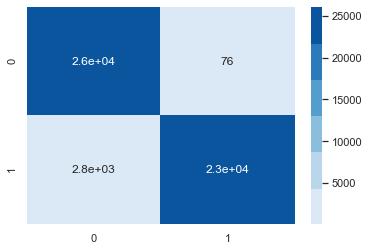

In [75]:
import seaborn as sns
cn_dt=confusion_matrix(y_test,y_pred_rf_best)
sns.heatmap(cn_dt, cmap = sns.color_palette("Blues"), annot=True)

After obtaining the optimal parameters of RF, importance of each features is identified and top-20 most important features are displayed.

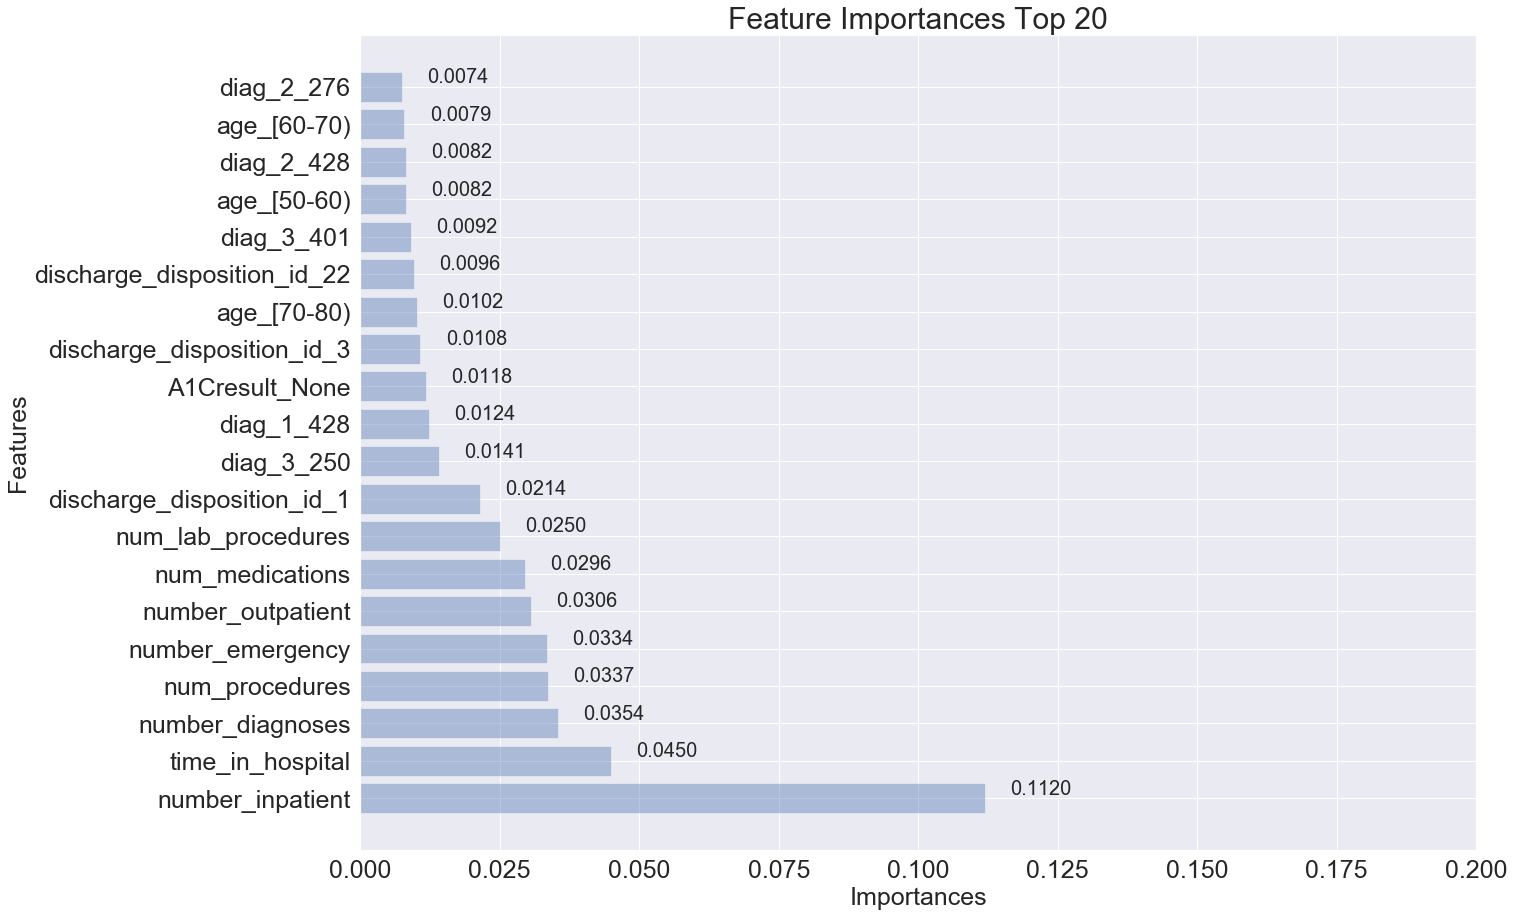

In [129]:
import heapq
y_importances=list(rf.feature_importances_)
features=list(diabete_onehot.iloc[:,0:-1].columns)
top_20_features_index=list(map(y_importances.index,heapq.nlargest(20,y_importances)))
x_importances=[]
y_importances_=[]
for i in top_20_features_index:
    x_importances.append(features[i])
    y_importances_.append(y_importances[i])
plt.figure(figsize=(20,15))
plt.barh(y=x_importances,width=y_importances_,alpha=0.4)
plt.xlabel('Importances',fontsize=25)
plt.xlim(0,0.2)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.ylabel('Features',fontsize=25)
plt.title('Feature Importances Top 20',fontsize=30)
for x,y in zip(x_importances,y_importances_):
    plt.text( y+0.01,x, '%.4f' % y, ha='center', va= 'bottom',fontsize=20)
plt.savefig('top_20_features.png')
plt.show()

# CONCLUSIONS

Health care has drawn more and more attention all over the world these days. In U.S., a program called Hospital Readmissions Reduction Program (HRRP) are trying to improve Americans’ health care by penalizing health systems with higher readmission rates than expected. Thus health systems are supposed to decrease their readmission rates as much as possible. However, due to the complexity and diversity of demographic, social, diseases and disease-related characteristics, it is difficult to decrease readmission rates merely based on clinical expertise. Therefore, this research aims to predict diabetic patients with high-risk readmissions via machine learning methods and help health systems identify readmission patterns. After data pre-processing, several models are trained, including Logistic Regression, Decision Tree, Support Vector Machine, Naive Bayes, K-Nearest Neighbour, Random Forest and Gradient Boosting Decision Tree. However, all these models perform badly. Thus a method called Borderline-SMOTE is used to rebalance the data and the models are trained again. The results show that this method really improves the ability of models. Then the performance of several models are compared, and Random Forest (RF) outperforms all the other models and is selected for further work. After parameter tuning, the accuracy of RF is 94.6%, precision is 99.7%, recall is 89.4%, and f1-score 94.3%, higher than all models including those in previous works. Finally, top 20 most important features are identified by RF. 

Limitations of this research are: 1) values of possibly important features such as “weight” are missing; 2) how these features influence the readmissions of diabetic patients has not decided yet.  Future work could be: 1) collecting more data and discovering whether these possibly important but missing features have influence on readmissions of diabetic patients; 2) determining whether these important features have positive influence or negative influence on readmissions of diabetic patients.